# Análise Exploratória em Conjunto de Dados do Kaggle

## Análise 1

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = "white")
%matplotlib inline

In [2]:
# Dataset
clean_data_path = "dataset/autos.csv"
df = pd.read_csv(clean_data_path, encoding = "latin-1")

In [3]:
print(df.shape)
df.head()

(313687, 27)


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313687 entries, 0 to 313686
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          313687 non-null  object
 1   name                 313687 non-null  object
 2   seller               313687 non-null  object
 3   offerType            313687 non-null  object
 4   price                313687 non-null  int64 
 5   abtest               313687 non-null  object
 6   vehicleType          313687 non-null  object
 7   yearOfRegistration   313687 non-null  int64 
 8   gearbox              313687 non-null  object
 9   powerPS              313687 non-null  int64 
 10  model                313687 non-null  object
 11  kilometer            313687 non-null  int64 
 12  monthOfRegistration  313687 non-null  object
 13  fuelType             313498 non-null  object
 14  brand                313687 non-null  object
 15  notRepairedDamage    313687 non-nu

In [5]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,postalCode,yearOfCreation,yearCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
count,313687.000000,313687.000000,313687.000000,313687.000000,313687.000000,313687.000000,313687.0,313687.000000,313687.000000,313687.000000,313687.000000
mean,3902.961863,2001.909231,109.564250,131435.778340,50349.563597,2015.999930,2016.0,8.543274,11.834207,14.090769,6.235187
std,4168.150636,6.803211,191.741685,34963.149957,25765.545682,0.008374,0.0,8.511917,6.504730,6.803211,3.454766
min,0.000000,1910.000000,0.000000,5000.000000,1067.000000,2015.000000,2016.0,0.000000,0.000000,0.000000,1.000000
25%,999.000000,1998.000000,68.000000,125000.000000,29640.000000,2016.000000,2016.0,2.000000,7.000000,10.000000,3.000000
50%,2490.000000,2002.000000,104.000000,150000.000000,49205.000000,2016.000000,2016.0,6.000000,12.000000,14.000000,6.000000
75%,5400.000000,2006.000000,140.000000,150000.000000,70794.000000,2016.000000,2016.0,13.000000,17.000000,18.000000,9.000000
max,28800.000000,2016.000000,20000.000000,150000.000000,99998.000000,2016.000000,2016.0,384.000000,23.000000,106.000000,11.000000


## Distribuição de Veículos com base no Ano de Registro

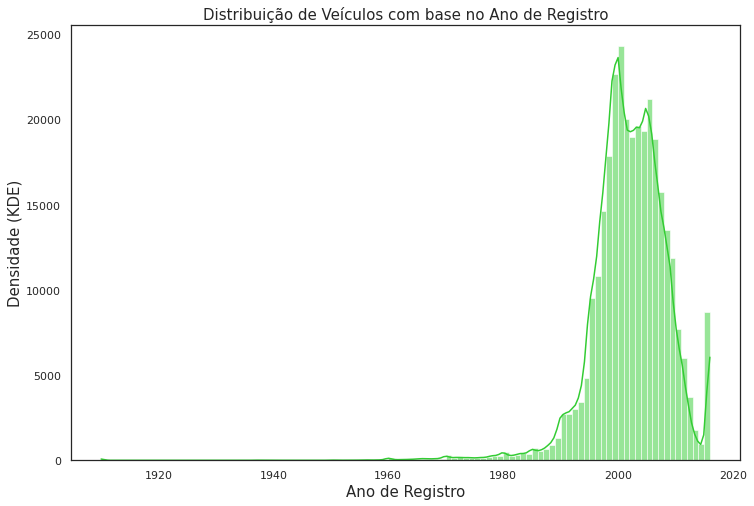

In [30]:
# Crie um Plot com a Distribuição de Veículos com base no Ano de Registro
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(df["yearOfRegistration"], color="#33cc33", kde=True, binwidth=1, ax=ax)
ax.set_title("Distribuição de Veículos com base no Ano de Registro", fontsize=15)
plt.ylabel("Densidade (KDE)", fontsize=15)
plt.xlabel("Ano de Registro", fontsize=15)
plt.show()

In [32]:
# Salvando o plot
fig.savefig("plots/Analise1/vehicle-distribution.png", facecolor="white")

## Variação da faixa de preço pelo tipo de veículo

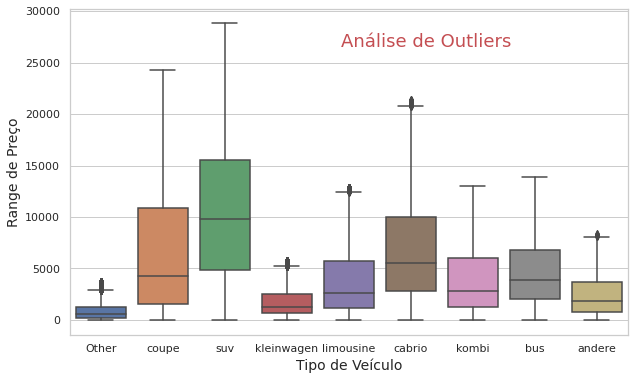

In [35]:
# Crie um Boxplot para avaliar os outliers
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x="vehicleType", y="price", data=df)
ax.text(5.25, 27000, "Análise de Outliers", fontsize=18, color="r", ha="center", va="center")
ax.xaxis.set_label_text("Tipo de Veículo", fontdict={'size':14})
ax.yaxis.set_label_text("Range de Preço", fontdict={'size':14})
plt.show()

In [36]:
# Salvando o plot
fig.savefig("plots/Analise1/price-vehicleType-boxplot.png")

## Contagem total de veículos à venda conforme o tipo de veículo

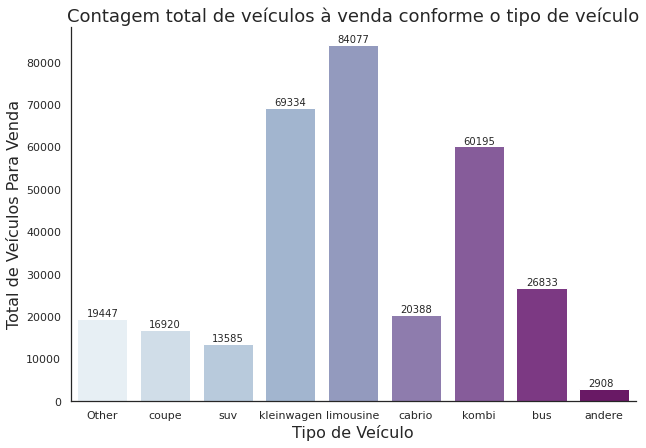

In [44]:
# Crie um Count Plot que mostre o número de veículos pertencentes a cada categoria 
sns.set_style("white")
fig = sns.catplot(x="vehicleType", data=df, kind="count", palette="BuPu", height=6, aspect=1.5)
fig.ax.xaxis.set_label_text("Tipo de Veículo", fontdict={'size':16})
fig.ax.yaxis.set_label_text("Total de Veículos Para Venda", fontdict={'size':16})
fig.ax.set_title("Contagem total de veículos à venda conforme o tipo de veículo", fontdict={'size':18})

## Contagem em cima da barra
for p in g.ax.patches:
  fig.ax.annotate((p.get_height()), (p.get_x() + 0.15, p.get_height() + 500))

In [45]:
# Salvando o plot
fig.savefig("plots/Analise1/count-vehicleType.png")

# Fim

### Obrigado

### Visite o Blog da Data Science Academy - <a href="http://blog.dsacademy.com.br">Blog DSA</a>